# Non linéarité et fonctions d'activations

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch import nn

from adl import activations

Dans les précédents TP, on a travaillé sur des problèmes que l'on a pu modéliser par des modèles linéaire car les données le voulaient. Cependant dans la plupart du temps le lien entre les données n'est pas linéaire.

Supposons que nous avons des données $x$ et $y$ mais que maintenant leur relation est sinusoîdale.

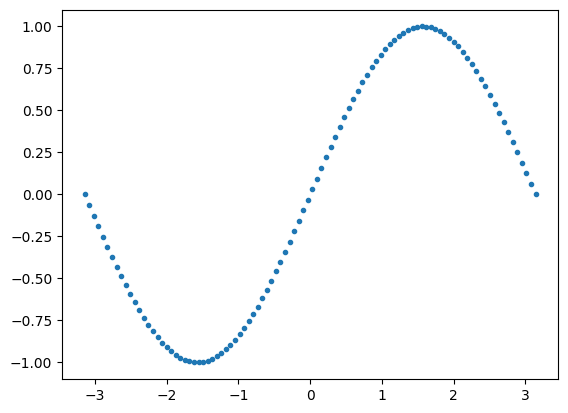

In [2]:
x = torch.tensor(np.linspace(-np.pi, np.pi, 100).reshape(-1, 1)).float()
y = x.sin()

plt.plot(x, y, ".")
plt.show()

On peut premièrement essayer un modèle linéaire de taille 1, qui est, comme nous l'avons vu, équivalent à faire une régression linéaire entre $x$ et $y$. 

Premièrement nous allons définir une classe pour un modèle linéaire avec *nn.Linear* et 1 pour ces paramètres (nombre de variables).

In [3]:
class SingleLinearModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Linear(1,1)
    
    def forward(self,x):
        return self.model(x)

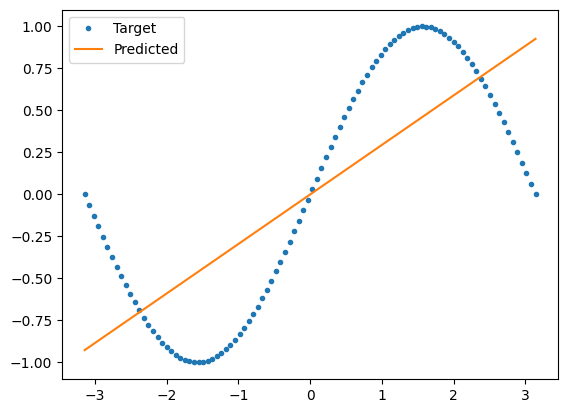

In [4]:
linear_model = SingleLinearModel()

train_model = activations.train(linear_model,x,y)
activations.plot(x, y,train_model)

On peut clairement voir que les prédictions du modèle ne représente pas les données.

On va donc améliorer notre model en ajoutant une autre couche linéaire avec une dimension caché de taille 5.

Pour ce faire, nous allons modifier l'attribut « model » de notre classe de modèle et
utiliser « nn.Sequential », qui permet de définir une série de couches qui
seront appliquées séquentiellement à nos données d'entrée.


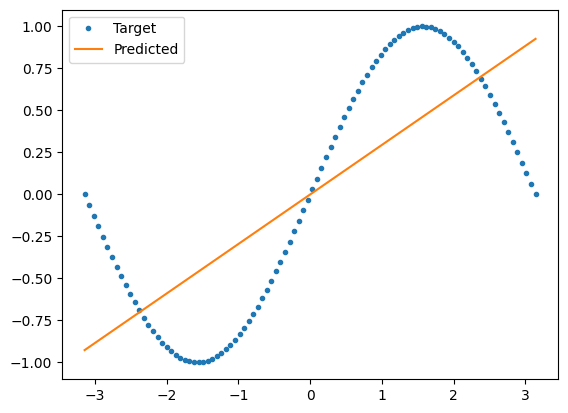

In [5]:
class LinearModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(1,5),
            nn.Linear(5,1),
        )
    
    def forward(self,x):
        return self.model(x)

linear_model = LinearModel()

trained_model = activations.train(linear_model,x,y)
activations.plot(x, y,trained_model)





Le résultat est exactement le même car on a une combinaison de transformation linéaire mais cela reste à la fin un modèle linéaire.

# Fonction d'activation 

Pour capturer des relations non-linéaire, les réseaux de neurones (deep learning) utilise des fonctions d'activations qui vont introduire de la non linéarité entre les couches.

Il y a plusieurs fonctions mais les trois principales sont : ReLU, Sigmoid et Tanh.

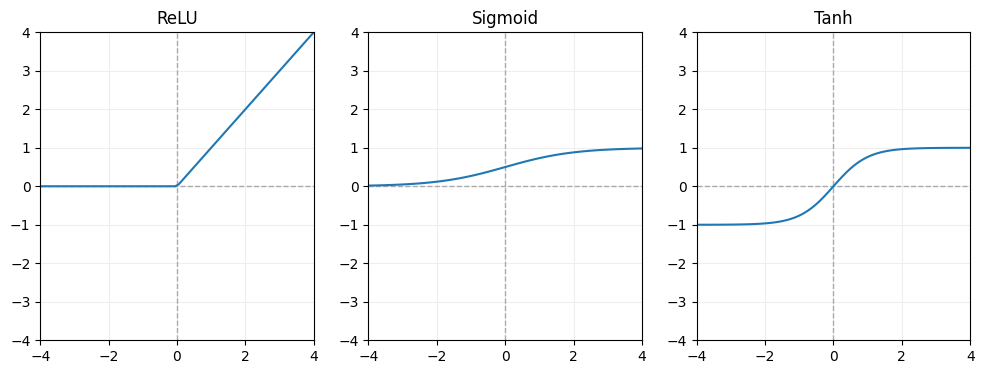

In [6]:
activation_fns = {"ReLU": nn.ReLU(), "Sigmoid": nn.Sigmoid(), "Tanh": nn.Tanh()}
activations.plot_activation_fns(activation_fns)

- La fonction ReLU conserve toutes les valeurs positives telles quelles et transforme
  toutes les valeurs négatives en 0.
- La fonction Sigmoid mappe les valeurs comprises entre 0 et 1
- La fonction Tanh mappe les valeurs comprises entre -1 et 1

En général, les fonctions d'activation sont simplement des fonctions sans paramètres
qui transforment leurs entrées : elles n'« apprennent » rien pendant le
processus d'entraînement et n'ajoutent aucun paramètre au modèle (il existe
quelques exceptions comme `PReLU`).

Si nous voulons ajouter une couche d'activation à notre modèle, il suffit de l'
insérer où nous le souhaitons, par exemple entre nos deux couches linéaires.

Voici le résultat si nous insérons une couche `nn.ReLU()`

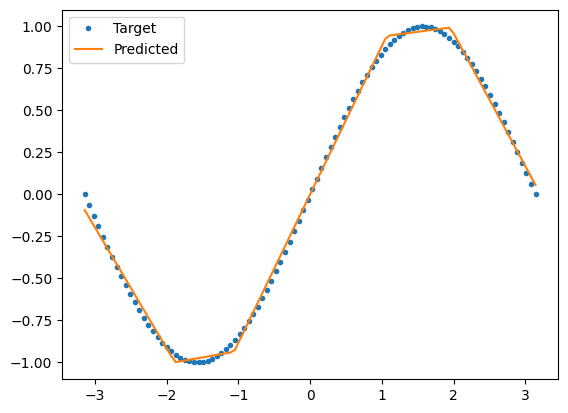

In [7]:
class ReluModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(1,5),
            nn.ReLU(),
            nn.Linear(5,1),
        )
    
    def forward(self,x):
        return self.model(x)
    

torch.manual_seed(133)

relu_model = ReluModel()

trained_model = activations.train(relu_model, x,y)
activations.plot(x,y,trained_model)

On remarque ici que ReLU permet de casser la linéarité en créant des segment qui permet de mieux fitter les données.

On peut remplacer nn.ReLU par nn.Sigmoid().

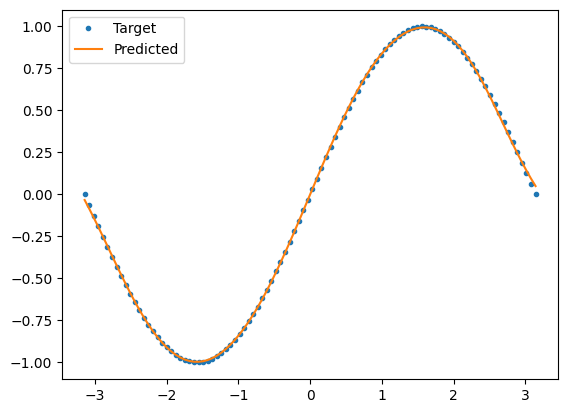

In [8]:
class SigmoidModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(1,5),
            nn.Sigmoid(),
            nn.Linear(5,1),
        )

    def forward(self,x):
        return self.model(x)
    
torch.manual_seed(123)

sigmoid_model = SigmoidModel()

trained_model = activations.train(sigmoid_model,x,y)
activations.plot(x,y,trained_model)

La nature sinusoïdale de nos données permet à la fonction sigmoïde de parfaitement fitter nos données.

# Exercice

On veut utiliser un réseau de neurone pour modéliser une relation non-linéaire entre $xc$ et $yc$.

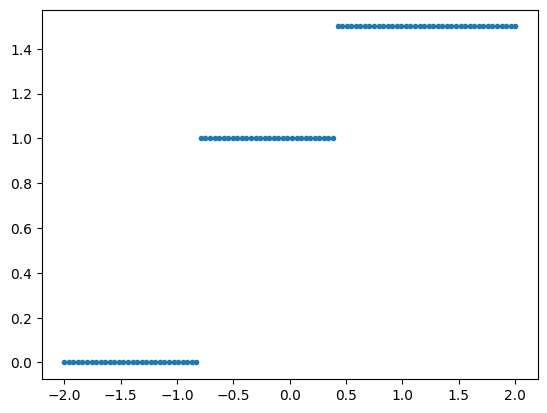

In [9]:
xc = torch.tensor(np.linspace(-2.0, 2.0, 100)).reshape(-1, 1).float()
yc = torch.tensor([0.0] * 30 + [1.0] * 30 + [1.5] * 40).reshape(-1, 1)

plt.plot(xc, yc, ".")
plt.show()

Créez les trois modèles suivants, entraînez chacun d'eux à l'aide de la fonction
`activations.train()` et tracez les résultats à l'aide de la fonction
`activations.plot()` :
- Un modèle linéaire avec deux couches linéaires et une dimension cachée de 10
- Un modèle avec deux couches linéaires, une dimension cachée de 10 et une
activation ReLU entre les deux
- Un modèle avec deux couches linéaires, une dimension cachée de 3 et une activation Tanh
entre les deux

# Modèle 1

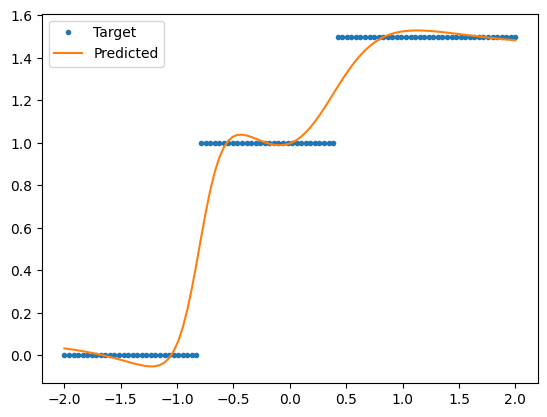

In [10]:
class LinearModele2_10(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(1,10),
            nn.Sigmoid(),
            nn.Linear(10,1),
        )
    
    def forward(self,x):
        return self.model(x)

model1 = LinearModele2_10()

trained_model1 = activations.train(model1,xc,yc)
activations.plot(xc,yc,trained_model1)

# Modèle 2

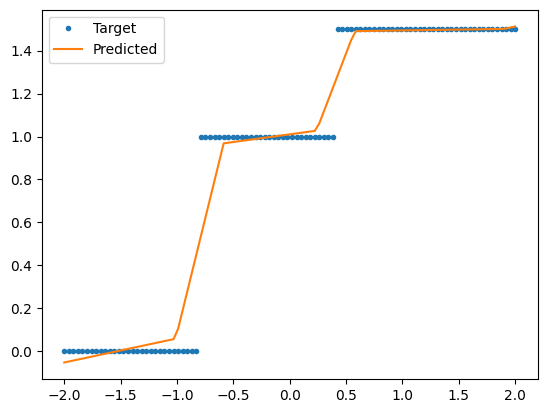

In [11]:
class ReluModel2_10(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(1,10),
            nn.ReLU(),
            nn.Linear(10,1),
        )
    
    def forward(self,x):
        return self.model(x)
    
model2 = ReluModel2_10()

trained_model2 = activations.train(model2,xc,yc)
activations.plot(xc,yc,trained_model2)

# Modèle 3

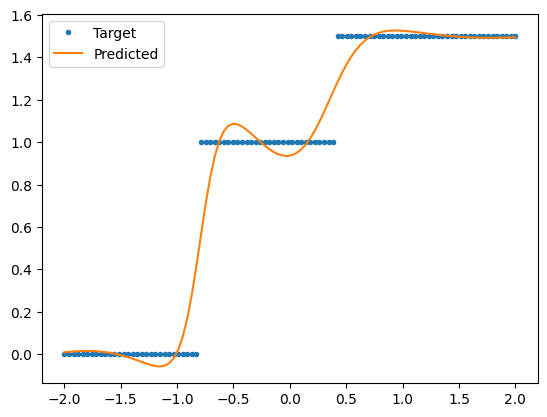

In [13]:
class TanhModel2_10(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(1,10),
            nn.Tanh(),
            nn.Linear(10,1),
        )
    
    def forward(self,x):
        return self.model(x)
    
model3 = TanhModel2_10()
trained_model3 = activations.train(model3,xc,yc)
activations.plot(xc,yc,trained_model3)